# ohsome API

An API for analysing OpenStreetMap history data.

*Further Resource:* [Website](https://heigit.org/big-spatial-data-analytics-en/ohsome/) | [GitHub](https://github.com/GIScience/ohsome-api) | [API](https://oqt.ohsome.org/api/docs)

## Jupyter notebook usage

- To execute a code block (to run a cell) hit: `shift + return` or click on the `Run` button at the top.
- After execution the circle in the top-right corner is filled grey. Once execution has finished the circle will be filled white again.

## Request the ohsome API

What is the temporal evolution of the number of features tagged as `highway=cycleway` in Berlin since 2014?

In [11]:
import json

from datetime import datetime

import requests


base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count"
url = base_url + endpoint

with open("germany-berlin.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    "filter": "highway=cycleway",
    "format": "json",
    "time": "2014-01-01/2022-01-01/P1Y",
}
headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["result"]

{
    "attribution": {
        "url": "https://ohsome.org/copyrights",
        "text": "\u00a9 OpenStreetMap contributors"
    },
    "apiVersion": "1.9.0",
    "result": [
        {
            "timestamp": "2014-01-01T00:00:00Z",
            "value": 432.0
        },
        {
            "timestamp": "2015-01-01T00:00:00Z",
            "value": 461.0
        },
        {
            "timestamp": "2016-01-01T00:00:00Z",
            "value": 362.0
        },
        {
            "timestamp": "2017-01-01T00:00:00Z",
            "value": 365.0
        },
        {
            "timestamp": "2018-01-01T00:00:00Z",
            "value": 438.0
        },
        {
            "timestamp": "2019-01-01T00:00:00Z",
            "value": 452.0
        },
        {
            "timestamp": "2020-01-01T00:00:00Z",
            "value": 486.0
        },
        {
            "timestamp": "2021-01-01T00:00:00Z",
            "value": 766.0
        },
        {
            "timestamp": "2022-01-01T00:0

## Plot the Results

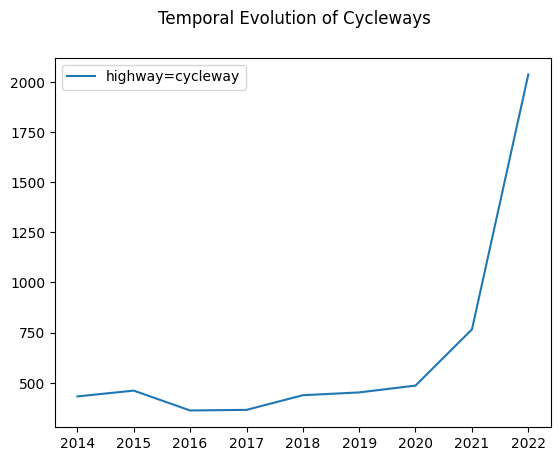

In [12]:
import matplotlib.pyplot as plt


dates = []
values = []
for r in result:
    year = datetime.fromisoformat(r["timestamp"].replace("Z", ""))
    dates.append(year)
    values.append(r["value"])

fig, ax = plt.subplots()
ax.plot(dates, values, label="highway=cycleway")
ax.legend()
fig.suptitle("Temporal Evolution of Cycleways")
plt.show()